In [1]:
from pushshift_py import PushshiftAPI
import requests
import liwc
import nltk
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def get_pushshift_data(data_type, **kwargs):

    base_url = f"https://api.pushshift.io/reddit/search/{data_type}/"
    payload = kwargs
    request = requests.get(base_url, params=payload)
    return request.json()

In [3]:
def get_submission_comments(submission_id):
    
    base_url = f"https://api.pushshift.io/reddit/comment/search/?link_id={submission_id}&limit=20000"
    request = requests.get(base_url)
    return request.json()

**Mar 2020 -  December 2020**

Submissions: 10 results

In [4]:
sub20 = get_pushshift_data(
    data_type = "submission",
    q = "remote learning", 
    sort_type = "num_comments",
    before = '453d',
    size = 10, 
    subreddit = "NewJersey").get("data")

In [5]:
sub20df = pd.DataFrame.from_records(sub20)[["id", "title", "num_comments", "permalink"]]
sub20df

,id,title,num_comments,permalink
0,huoxjf,N.J. to allow all-remote learning option for s...,568,/r/newjersey/comments/huoxjf/nj_to_allow_allre...
1,i9krqw,"Months ago, schools should have simply said th...",143,/r/newjersey/comments/i9krqw/months_ago_school...
2,i8hzi7,COVID-19 reopening update (8/12/2020): Governo...,82,/r/newjersey/comments/i8hzi7/covid19_reopening...
3,i667v8,Other states and countries attempted in person...,67,/r/newjersey/comments/i667v8/other_states_and_...
4,kitfrm,Petition for Rutgers to suspend parking citati...,29,/r/newjersey/comments/kitfrm/petition_for_rutg...
5,i2kgcf,We have so much research why opening schools f...,27,/r/newjersey/comments/i2kgcf/we_have_so_much_r...
6,jwgsyq,Teachers union calls for remote learning after...,22,/r/newjersey/comments/jwgsyq/teachers_union_ca...
7,hu5m6n,NJ leads the way in decreasing COVID-19 cases ...,19,/r/newjersey/comments/hu5m6n/nj_leads_the_way_...
8,i7zpb8,School district (Elizabeth) votes for all remo...,15,/r/newjersey/comments/i7zpb8/school_district_e...
9,i48993,Remote learning gets mixed marks in NJ survey ...,10,/r/newjersey/comments/i48993/remote_learning_g...


Comments 

In [6]:
comm20df = pd.DataFrame()

In [7]:
for i in sub20df.index:
    if(sub20df.loc[i]['num_comments'] > 0):
    #skips rows where the submission has no comments
        
        comm20 = (get_submission_comments(sub20df.loc[i]['id'])).get('data')
        tempdf = pd.DataFrame.from_records(comm20)[['created_utc', 'body']]
        comm20df = comm20df.append(tempdf, ignore_index = True)

In [8]:
for i in comm20df.index:
    if comm20df.loc[i, 'body'] == '[deleted]': 
        comm20df.drop(i, inplace = True)
    
    elif comm20df.loc[i, 'body'] == '[removed]': 
        comm20df.drop(i, inplace = True)

comm20df.reset_index(drop = True, inplace = True)
comm20df

,created_utc,body
0,1595703982,You don’t think the virus just spreads and doe...
1,1595698656,"Yes, and we were also one of the first states ..."
2,1595695717,Well over all he has second most deaths statew...
3,1595695613,In the 60s and 70s NJ would have 70+ dew point...
4,1595695330,Would you like to offer anything to back that ...
...,...,...
677,1596649583,Parents are taxpayers. It’s how the system is ...
678,1596647605,Why is that?
679,1596647295,I suggest you rethink your response.
680,1596645167,Meanwhile in Georgia...\n\n[https://www.usnews...


In [13]:
for i in (comm20df.index):
    if len(comm20df.loc[i, 'body']) < 25:
        comm20df.drop(i, inplace =True)
comm20df

,created_utc,body
0,1595703982,You don’t think the virus just spreads and doe...
1,1595698656,"Yes, and we were also one of the first states ..."
2,1595695717,Well over all he has second most deaths statew...
3,1595695613,In the 60s and 70s NJ would have 70+ dew point...
4,1595695330,Would you like to offer anything to back that ...
...,...,...
676,1596663742,They can vote in November. Going back will cau...
677,1596649583,Parents are taxpayers. It’s how the system is ...
679,1596647295,I suggest you rethink your response.
680,1596645167,Meanwhile in Georgia...\n\n[https://www.usnews...


**Jan 2021 - Aug 2021**

Submissions: 5 results

In [9]:
sub21 = get_pushshift_data(
    data_type = "submission", 
    q = "remote learning", 
    sort_type = "num_comments",
    after = '452d',
    before = '210d',
    size = 10, 
    subreddit = "NewJersey").get("data")

In [10]:
sub21df = pd.DataFrame.from_records(sub21)[["id", "title", "num_comments", "permalink"]]
sub21df

,id,title,num_comments,permalink
0,p2p313,"6,135 already signed if you support the option...",0,/r/newjersey/comments/p2p313/6135_already_sign...
1,mhmg86,Everyone back to school — no remote learning —...,1,/r/newjersey/comments/mhmg86/everyone_back_to_...
2,o1at2b,Here’s how N.J. students learned in the final ...,10,/r/newjersey/comments/o1at2b/heres_how_nj_stud...


Comments

In [14]:
comm21df = pd.DataFrame()

In [15]:
for i in sub21df.index:
    if(sub21df.loc[i]['num_comments'] > 0):

        comm21 = (get_submission_comments(sub21df.loc[i]['id'])).get('data')
        tempdf = pd.DataFrame.from_records(comm21)[['created_utc', 'body']]
        comm21df = comm21df.append(tempdf, ignore_index = True)

NameError: name 'sub21df' is not defined

In [16]:
for i in comm21df.index:
    if comm21df.loc[i, 'body'] == '[deleted]': 
        comm21df.drop(i, inplace = True)
    
    elif comm21df.loc[i, 'body'] == '[removed]': 
        comm21df.drop(i, inplace = True)

comm21df.reset_index(drop = True, inplace = True)
comm21df

""


In [ ]:
for i in (comm21df.index):
    if len(comm21df.loc[i, 'body']) < 25:
        comm21df.drop(i, inplace =True)
comm21df

**Sep 2021 - Mar 2022**

Submissions: 5 results

In [14]:
sub22 = get_pushshift_data(
    data_type = "submission", 
    q = "remote learning", 
    sort_type = "num_comments",
    after = '210d',
    size = 10, 
    subreddit = "NewJersey").get("data")

In [15]:
sub22df = pd.DataFrame.from_records(sub22)[["id", "title", "num_comments", "permalink"]]
sub22df

,id,title,num_comments,permalink
0,s0q6lr,Live Now (1:00PM): Governor Phil Murphy’s week...,0,/r/newjersey/comments/s0q6lr/live_now_100pm_go...
1,ru87od,N.J.’s largest school district will switch to ...,0,/r/newjersey/comments/ru87od/njs_largest_schoo...
2,rv7qe0,Live Now (1:00PM): Governor Phil Murphy’s week...,0,/r/newjersey/comments/rv7qe0/live_now_100pm_go...
3,q6x8af,Do you think Murphy is going to permit remote-...,10,/r/newjersey/comments/q6x8af/do_you_think_murp...
4,spmxeq,A childhood rite of passage may soon become a ...,24,/r/newjersey/comments/spmxeq/a_childhood_rite_...


Comments

In [16]:
comm22df = pd.DataFrame()

In [17]:
for i in sub22df.index:
    if(sub22df.loc[i]['num_comments'] > 0):
        
        comm22 = (get_submission_comments(sub22df.loc[i]['id'])).get('data')
        tempdf = pd.DataFrame.from_records(comm22)[['created_utc', 'body']]
        comm22df = comm22df.append(tempdf, ignore_index = True)

KeyError: "None of [Index(['created_utc', 'body'], dtype='object')] are in the [columns]"

In [18]:
for i in comm22df.index:
    if comm22df.loc[i, 'body'] == '[deleted]': 
        comm22df.drop(i, inplace = True)
    
    elif comm22df.loc[i, 'body'] == '[removed]': 
        comm22df.drop(i, inplace = True)

comm22df.reset_index(drop = True, inplace = True)
comm22df

,created_utc,body
0,1634220471,Our school has pretty much told us that going ...
1,1634161215,With the advancements in Covid-19 research and...
2,1634095928,I think it depends on how much pressure he’s g...
3,1634090500,"Nothing will happen before Election Day, that’..."
4,1634085388,At our school board meeting last week they sai...
5,1634084022,If things get bad it may be the only option av...
6,1634082370,I dont think so and I do understand families w...
7,1634081268,"Unless if it’s absolutely dire, most likely Go..."
8,1634078732,No.


In [ ]:
for i in (comm22df.index):
    if len(comm22df.loc[i, 'body']) < 25:
        comm22df.drop(i, inplace =True)
comm22df

Merged comments into 1 dataframe using Hierarchical Indexing

In [19]:
commentsdf = pd.concat([comm20df, comm21df, comm22df], 
          keys=['2020', '2021', '2022'])
commentsdf

created_utc                                               body
2020 0   1595703982  You don’t think the virus just spreads and doe...
     1   1595698656  Yes, and we were also one of the first states ...
     2   1595695717  Well over all he has second most deaths statew...
     3   1595695613  In the 60s and 70s NJ would have 70+ dew point...
     4   1595695330  Would you like to offer anything to back that ...
...             ...                                                ...
2022 4   1634085388  At our school board meeting last week they sai...
     5   1634084022  If things get bad it may be the only option av...
     6   1634082370  I dont think so and I do understand families w...
     7   1634081268  Unless if it’s absolutely dire, most likely Go...
     8   1634078732                                                No.

[697 rows x 2 columns]

**Convert datetime**

In [20]:
commentsdf['datetime'] = datetime

for i in commentsdf.index:
    if pd.notnull(commentsdf.loc[i]['created_utc']):
        
        dt = datetime.fromtimestamp(commentsdf.loc[i]['created_utc'])
        commentsdf.loc[i, 'datetime'] = dt

In [21]:
commentsdf.drop('created_utc', axis = 1, inplace = True)
commentsdf

body             datetime
2020 0  You don’t think the virus just spreads and doe...  2020-07-25 15:06:22
     1  Yes, and we were also one of the first states ...  2020-07-25 13:37:36
     2  Well over all he has second most deaths statew...  2020-07-25 12:48:37
     3  In the 60s and 70s NJ would have 70+ dew point...  2020-07-25 12:46:53
     4  Would you like to offer anything to back that ...  2020-07-25 12:42:10
...                                                   ...                  ...
2022 4  At our school board meeting last week they sai...  2021-10-12 20:36:28
     5  If things get bad it may be the only option av...  2021-10-12 20:13:42
     6  I dont think so and I do understand families w...  2021-10-12 19:46:10
     7  Unless if it’s absolutely dire, most likely Go...  2021-10-12 19:27:48
     8                                                No.  2021-10-12 18:45:32

[697 rows x 2 columns]

**NLTK Analysis**

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\laure\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
sia = SentimentIntensityAnalyzer()
commentsdf[['negative', 'neutral', 'positive']] = float

for i in commentsdf.index:
    
    commentsdf.loc[i]['negative'] = sia.polarity_scores(commentsdf.loc[i]['body'])['neg']
    commentsdf.loc[i]['neutral'] = sia.polarity_scores(commentsdf.loc[i]['body'])['neu']
    commentsdf.loc[i]['positive'] = sia.polarity_scores(commentsdf.loc[i]['body'])['pos']

In [24]:
commentsdf

body  \
2020 0  You don’t think the virus just spreads and doe...   
     1  Yes, and we were also one of the first states ...   
     2  Well over all he has second most deaths statew...   
     3  In the 60s and 70s NJ would have 70+ dew point...   
     4  Would you like to offer anything to back that ...   
...                                                   ...   
2022 4  At our school board meeting last week they sai...   
     5  If things get bad it may be the only option av...   
     6  I dont think so and I do understand families w...   
     7  Unless if it’s absolutely dire, most likely Go...   
     8                                                No.   

                   datetime negative neutral positive  
2020 0  2020-07-25 15:06:22    0.276   0.629    0.095  
     1  2020-07-25 13:37:36     0.05   0.854    0.096  
     2  2020-07-25 12:48:37    0.049   0.872     0.08  
     3  2020-07-25 12:46:53     0.09   0.886    0.024  
     4  2020-07-25 12:42:10     0.09   0.769     0.14  
...                     ...      ...     ...      ...  
2022 4  2021-10-12 20:36:28    0.025   0.975      0.0  
     5  2021-10-12 20:13:42    0.203   0.623    0.174  
     6  2021-10-12 19:46:10    0.135   0.819    0.045  
     7  2021-10-12 19:27:48    0.113   0.835    0.052  
     8  2021-10-12 18:45:32      1.0     0.0      0.0  

[697 rows x 5 columns]

**Plotting negative, neutral, positive values**

<AxesSubplot:xlabel='datetime'>

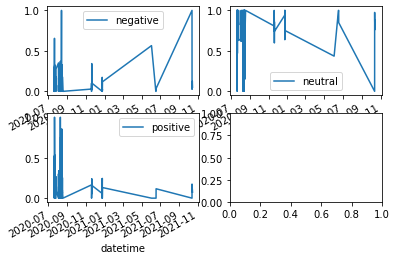

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2)

commentsdf.plot(x = 'datetime', y = 'negative', ax = axes[0,0])
commentsdf.plot(x = 'datetime', y = 'neutral',  ax = axes[0,1])
commentsdf.plot(x = 'datetime', y = 'positive', ax = axes[1,0])